### This is a startbook for MULTI-Class , please see binary book for that starter pack

This notebook is a "starter" file that just concats and labels all of our datasets. Team members will clone this notebook and build off of it to ensure uniformity across ML models.
*make sure all the csv's that are being imported to this are in your working directory!*

In [1]:
#DAEN 690 - GMU
#Multiclass Classification Test - Decision Tree
#Jim McMahon - Team Valkyrie

In [2]:
#Import pandas and other necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn import metrics
import numpy as np
import os

In [3]:
#Create a custom function for data transformation
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

<ipython-input-3-154415b330a2>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

In [6]:
#Adding column for "maneuver" field

df['maneuver'] = 0

#label data points from 9/19 set 
df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['maneuver']] = 'quick'

#label data points from 9/20 set
df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['maneuver']] = 'hover'

#label data points 9/22
df.loc[(df['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['maneuver']] = 'hover'
#df.loc[(df['datetime'].between('2022-09-22 21:34:50' , '2022-09-22 21:35:46' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:36:50' , '2022-09-22 21:37:10' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['maneuver']] = 'hover'

In [7]:
# Drops values of 0; indicates timeframe did not have a corresponding flight log label
df.drop(df[df['maneuver']==0].index, inplace=True)

In [8]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df[model_features]
y = df['maneuver']

In [9]:
#Showing class imbalance
predictor_count = y.value_counts()
print(predictor_count)

hover      1014
surface     637
quick       236
Name: maneuver, dtype: int64


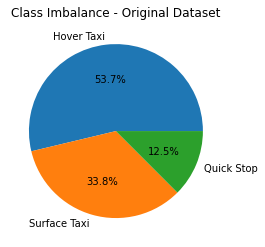

In [10]:
#Visualize initial class imbalance
pie_labels = ["Hover Taxi", "Surface Taxi", "Quick Stop"]
plt.pie(predictor_count, labels = pie_labels, autopct='%1.1f%%')
plt.title("Class Imbalance - Original Dataset")
plt.show()

In [11]:
#Importing a few other necessary functions, can be moved from this spot if needed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [12]:
#This is the training and test split, the test size can be adjusted but should remain around 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [13]:
df

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,maneuver
223,223,2022-09-20 20:25:50,39.450663,-74.566196,0.290000,113.827175,101.529425,0.658775,0.659331,-1.950800,...,1.0,-0.283800,-37.349850,-4.746850,34.020775,-0.331850,44.952450,35.113250,35.113250,surface
224,224,2022-09-20 20:25:51,39.450662,-74.566189,0.469429,113.765086,101.467257,1.815429,1.824004,-2.992143,...,1.0,-0.186971,-44.221371,-2.720200,34.114886,-0.028457,46.346171,39.858829,39.858829,surface
225,225,2022-09-20 20:25:52,39.450659,-74.566174,0.494865,113.580027,101.282189,3.182162,3.187820,-3.122432,...,1.0,-0.185595,-43.949514,-2.258081,33.822676,0.581703,44.717378,37.255216,37.255216,surface
226,226,2022-09-20 20:25:53,39.450656,-74.566151,0.395128,113.414872,101.117026,4.566308,4.566426,-2.590872,...,1.0,-0.130692,-44.382846,-2.766103,34.101051,4.291051,43.760026,34.740718,34.740718,surface
227,227,2022-09-20 20:25:54,39.450651,-74.566120,0.443846,114.143000,101.845179,5.930205,5.930491,-2.826256,...,1.0,0.231821,-42.757154,-2.328923,33.948026,7.572462,43.522821,34.127026,34.127026,surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,1832,2022-09-22 21:45:27,20.889180,-156.433838,7.234242,159.569364,169.050212,7.634606,7.634731,6.034848,...,0.0,-0.557242,-6.816242,-0.329030,44.082303,-12.962030,53.845212,56.147030,56.147030,hover
6966,1833,2022-09-22 21:45:28,20.889150,-156.433854,7.111667,158.185417,167.666306,7.410056,7.416813,7.241722,...,0.0,-0.742417,-2.832722,-2.119806,43.298806,-14.933333,53.793722,56.382583,56.382583,hover
6967,1834,2022-09-22 21:45:29,20.889121,-156.433870,6.099375,155.997000,165.477906,6.543594,6.597198,9.295312,...,0.0,-1.344875,-7.430469,-1.746781,42.629531,-16.627781,52.920031,54.414844,54.414844,hover
6968,1835,2022-09-22 21:45:30,20.889097,-156.433885,4.759524,153.160071,162.640976,5.170524,5.213154,9.935619,...,0.0,-1.740167,-7.563048,0.223333,43.095690,-18.011048,52.878024,53.820167,53.820167,hover


[Text(0.5, 1.0, 'Correlation Heatmap')]

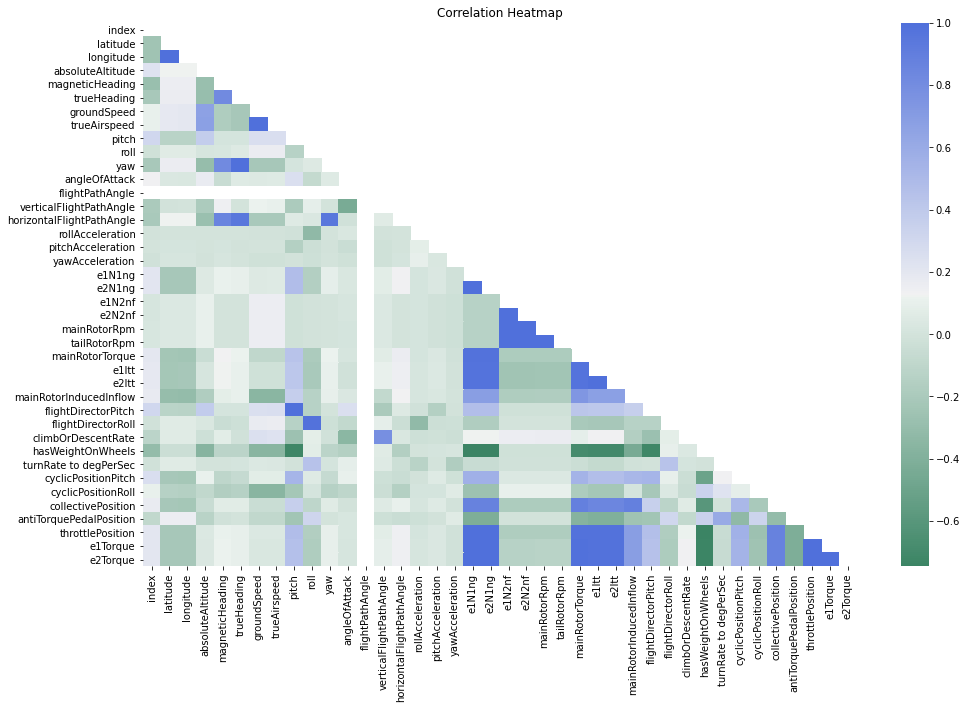

In [14]:
#Testing correlation heatmap used by teammates for other algorithm exploration
df_corr = df.corr()
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(150, 260, as_cmap=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, cmap=cmap).set(title = 'Correlation Heatmap')

In [15]:
#Setting depth for decision tree test
clf = DecisionTreeClassifier(max_depth = 5, random_state = 56)

In [16]:
#Training fit
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=56)

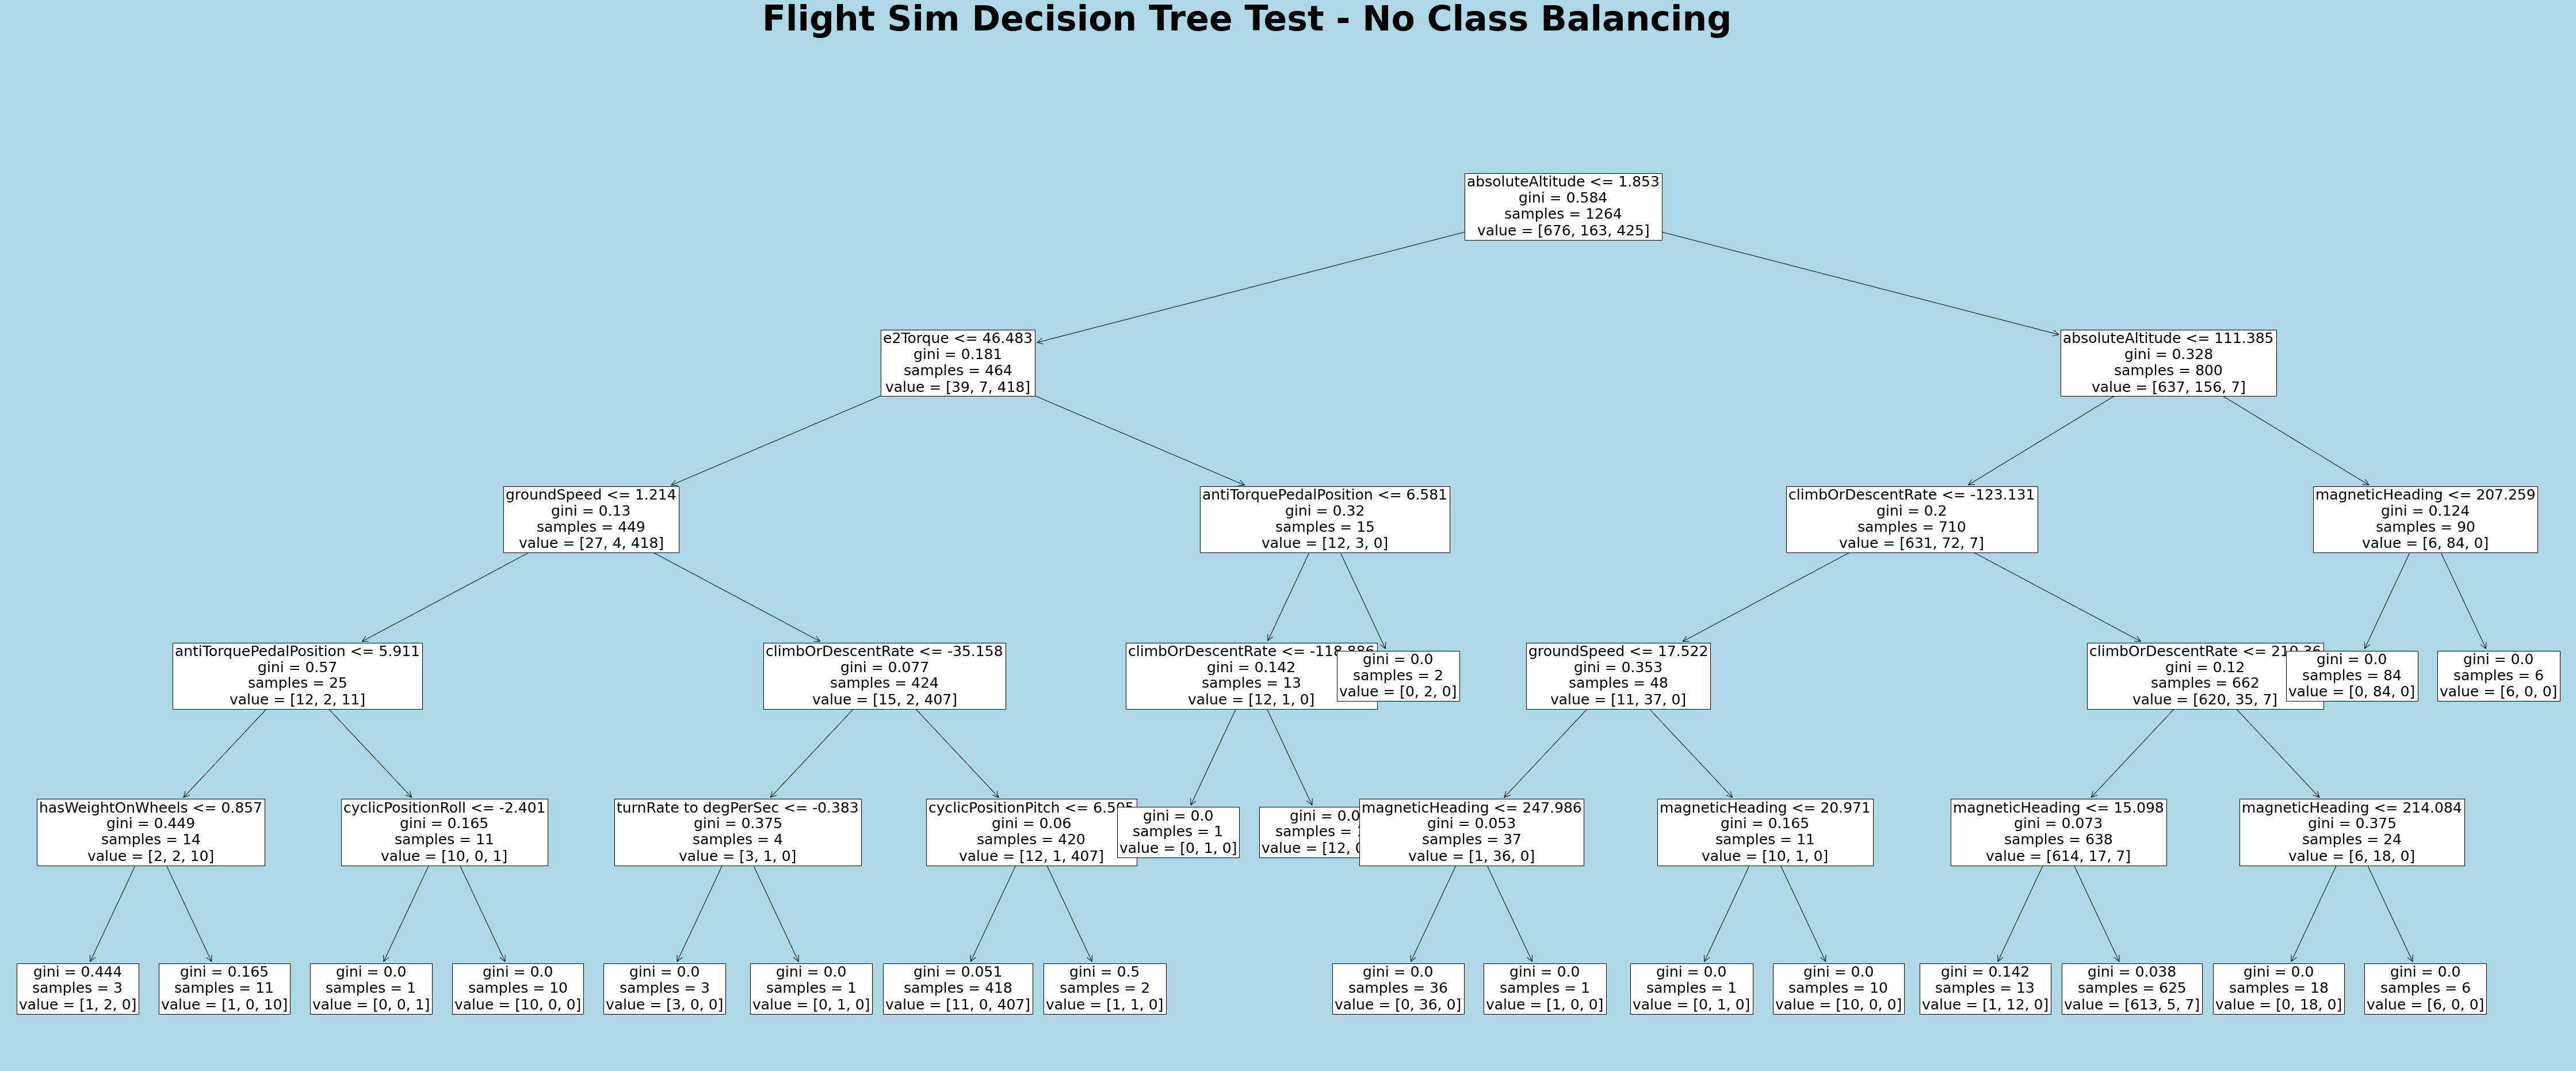

In [17]:
#Showing tree visualization test, the blue background tree does not include class balancing
plt.subplots(figsize=(80, 30), facecolor='lightblue')
plt.suptitle("Flight Sim Decision Tree Test - No Class Balancing", fontweight="bold", fontsize="60")
tree_graphic_test = tree.plot_tree(
    clf,
    feature_names = model_features,
    fontsize= 25)
plt.show()

In [18]:
#Text based tree test
tree_text_test = export_text(clf)
print(tree_text_test)

|--- feature_1 <= 1.85
|   |--- feature_12 <= 46.48
|   |   |--- feature_3 <= 1.21
|   |   |   |--- feature_9 <= 5.91
|   |   |   |   |--- feature_0 <= 0.86
|   |   |   |   |   |--- class: quick
|   |   |   |   |--- feature_0 >  0.86
|   |   |   |   |   |--- class: surface
|   |   |   |--- feature_9 >  5.91
|   |   |   |   |--- feature_7 <= -2.40
|   |   |   |   |   |--- class: surface
|   |   |   |   |--- feature_7 >  -2.40
|   |   |   |   |   |--- class: hover
|   |   |--- feature_3 >  1.21
|   |   |   |--- feature_4 <= -35.16
|   |   |   |   |--- feature_5 <= -0.38
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_5 >  -0.38
|   |   |   |   |   |--- class: quick
|   |   |   |--- feature_4 >  -35.16
|   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |--- class: surface
|   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |--- class: hover
|   |--- feature_12 >  46.48
|   |   |--- feature_9 <= 6.58
|   |   |   |--- feature_4 <= -118.89
|   |   |   |   |-

In [19]:
#Showing tree accuracy metric
y_pred1 = clf.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Decision Tree Accuracy: 0.9775280898876404


In [20]:
#Text based confusion matrix
dtcm1 = confusion_matrix(y_test, y_pred1)
print(dtcm1)

[[330   2   6]
 [  4  68   1]
 [  1   0 211]]


[Text(0, 0.5, 'Hover Taxi'),
 Text(0, 1.5, 'Quick Stop'),
 Text(0, 2.5, 'Surface Taxi')]

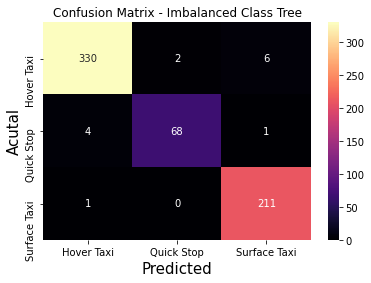

In [21]:
#Show more polished confusion matrix for class imbalanced tree
cmp_df1 = pd.DataFrame(dtcm1)
ax = plt.axes()
sns.heatmap(cmp_df1, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Imbalanced Class Tree')
ax.set_xlabel('Predicted', fontsize = 15)
ax.xaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])
ax.set_ylabel('Acutal', fontsize = 15)
ax.yaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])

In [22]:
#Showing precision score
prec_score1 = precision_score(y_test, y_pred1, average = None)
print(prec_score1)

[0.98507463 0.97142857 0.96788991]


In [23]:
#Showing recall score
recall_score1 = accuracy_score(y_test, y_pred1)
print(recall_score1)

0.9775280898876404


In [24]:
#Breakdown of class imbalance
class_weights = df['maneuver'].value_counts()/len(df)
print(class_weights)

hover      0.537361
surface    0.337573
quick      0.125066
Name: maneuver, dtype: float64


In [25]:
#Decided to use class_weight = balanced parameter to auto-balance class in df
clf2 = DecisionTreeClassifier(max_depth = 5, random_state = 56, class_weight = 'balanced')
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=56)

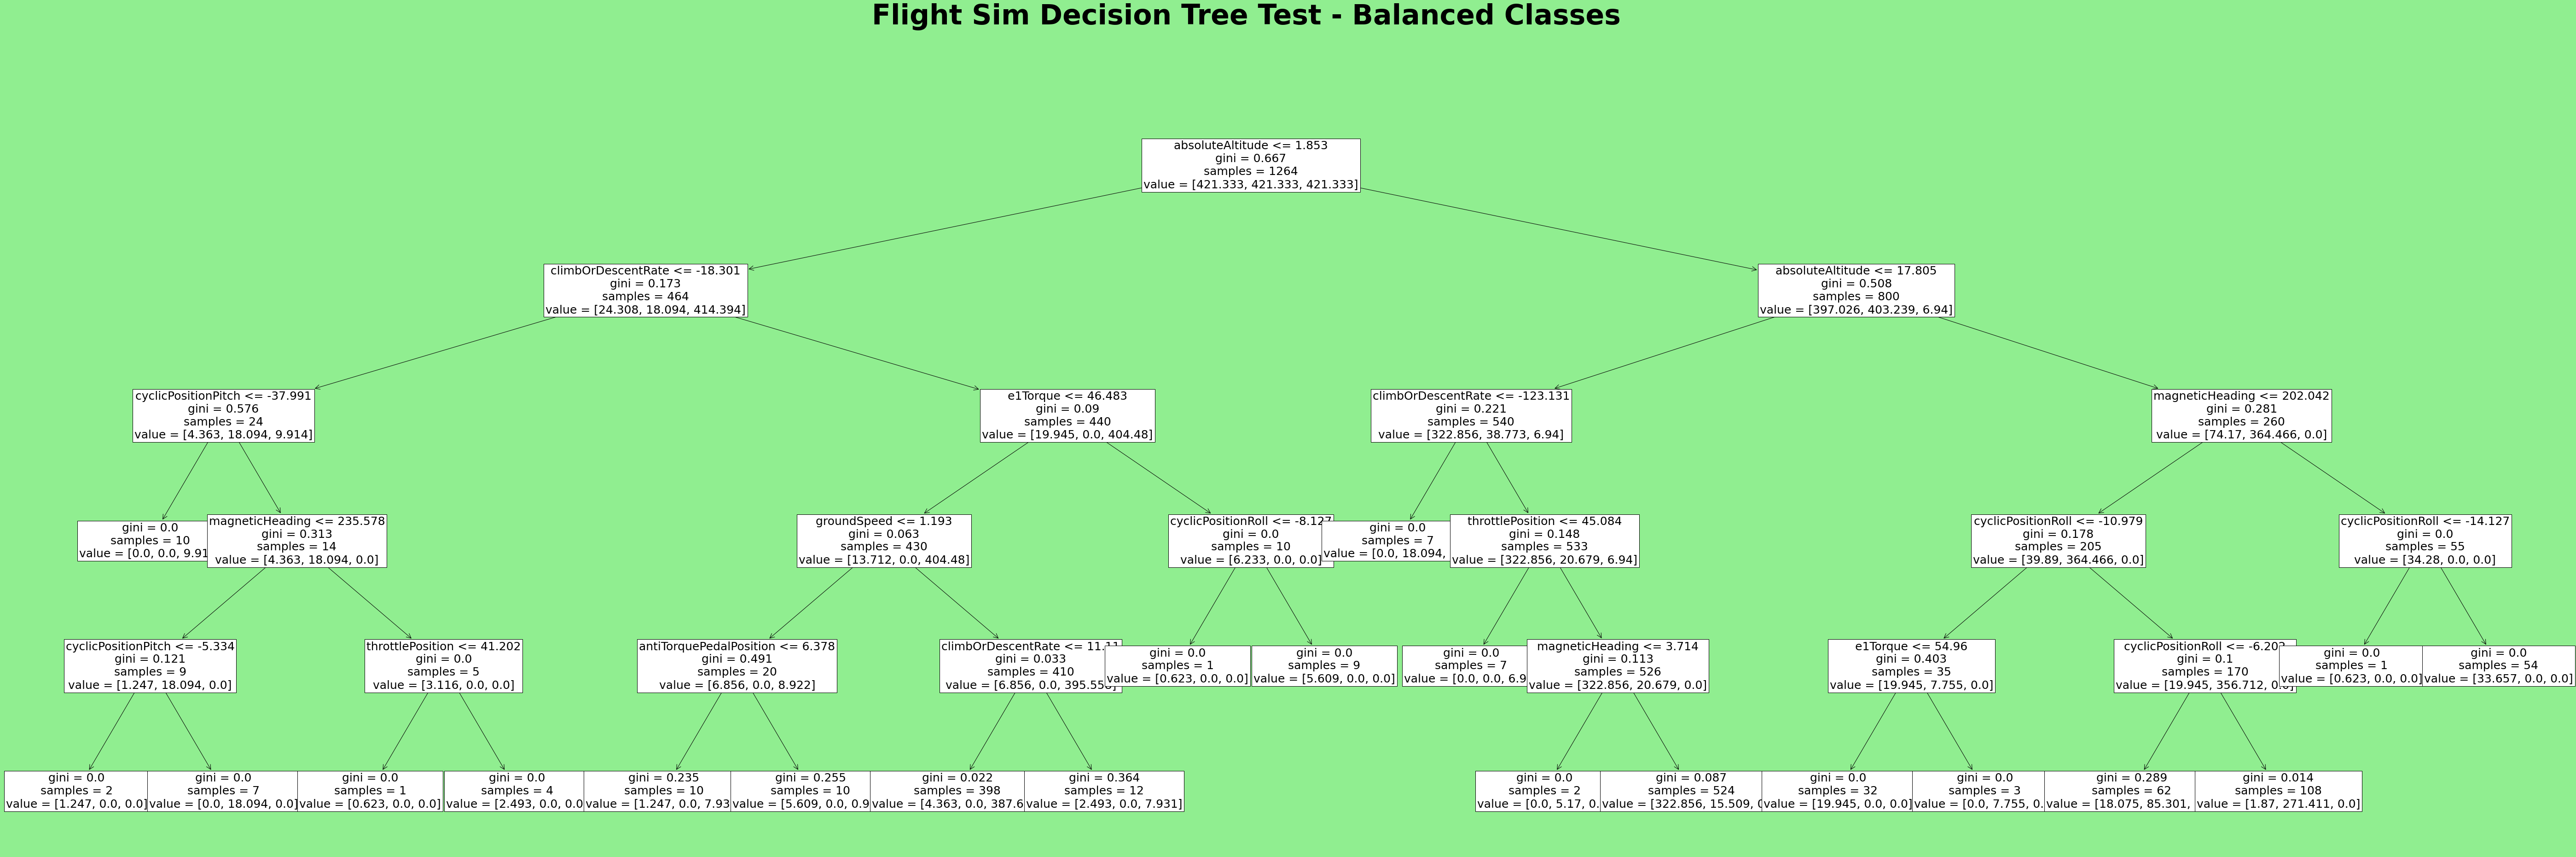

In [26]:
#Showing tree visualization test, the green background tree includes class balancing
plt.subplots(figsize=(100, 30), facecolor='lightgreen')
plt.suptitle("Flight Sim Decision Tree Test - Balanced Classes", fontweight="bold", fontsize="60")
tree_graphic_test = tree.plot_tree(
    clf2,
    feature_names = model_features,
    fontsize= 25)
plt.show()

In [27]:
#Class balanced text tree test
tree_text_test = export_text(clf2)
print(tree_text_test)

|--- feature_1 <= 1.85
|   |--- feature_4 <= -18.30
|   |   |--- feature_6 <= -37.99
|   |   |   |--- class: surface
|   |   |--- feature_6 >  -37.99
|   |   |   |--- feature_2 <= 235.58
|   |   |   |   |--- feature_6 <= -5.33
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_6 >  -5.33
|   |   |   |   |   |--- class: quick
|   |   |   |--- feature_2 >  235.58
|   |   |   |   |--- feature_10 <= 41.20
|   |   |   |   |   |--- class: hover
|   |   |   |   |--- feature_10 >  41.20
|   |   |   |   |   |--- class: hover
|   |--- feature_4 >  -18.30
|   |   |--- feature_11 <= 46.48
|   |   |   |--- feature_3 <= 1.19
|   |   |   |   |--- feature_9 <= 6.38
|   |   |   |   |   |--- class: surface
|   |   |   |   |--- feature_9 >  6.38
|   |   |   |   |   |--- class: hover
|   |   |   |--- feature_3 >  1.19
|   |   |   |   |--- feature_4 <= 11.11
|   |   |   |   |   |--- class: surface
|   |   |   |   |--- feature_4 >  11.11
|   |   |   |   |   |--- class: surface
|   |   |--- f

In [28]:
#Balanced tree accuracy
y_pred2 = clf2.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Decision Tree Accuracy: 0.9486356340288925


In [29]:
#Balanced tree text based confusion matrix
dtcm2 = confusion_matrix(y_test, y_pred2)
print(dtcm2)

[[312  20   6]
 [  4  68   1]
 [  1   0 211]]


[Text(0, 0.5, 'Hover Taxi'),
 Text(0, 1.5, 'Quick Stop'),
 Text(0, 2.5, 'Surface Taxi')]

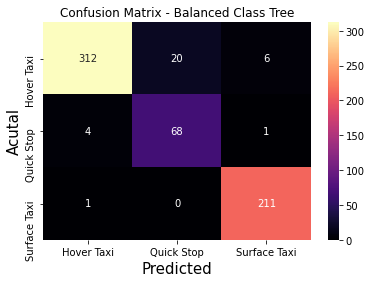

In [30]:
#Balanced tree polished confusion matrix
cmp_df2 = pd.DataFrame(dtcm2)
ax = plt.axes()
sns.heatmap(cmp_df2, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Balanced Class Tree')
ax.set_xlabel('Predicted', fontsize = 15)
ax.xaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])
ax.set_ylabel('Acutal', fontsize = 15)
ax.yaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])

In [31]:
#Balanced tree precision score
prec_score2 = precision_score(y_test, y_pred2, average = None)
print(prec_score2)

[0.98422713 0.77272727 0.96788991]


In [32]:
#Balanced tree accuracy score
recall_score2 = accuracy_score(y_test, y_pred2)
print(recall_score2)

0.9486356340288925


In [33]:
#Validation test using October data

#Reading files from 10/20 dataset
df1_valid = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1_valid = df_transformation(df1_valid)


#Reading files from 10/27 dataset
df2_valid = pd.read_csv('SimData_2022.10.27_17.55.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2_valid = df_transformation(df2_valid)

<ipython-input-3-154415b330a2>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [34]:
#Combine files
df_valid = pd.concat([df1_valid, df2_valid]).reset_index()

In [35]:
#Adding column for "maneuver" field

df_valid['maneuver'] = 0

In [36]:
#Label Quick Stop in validation DF
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['maneuver']] = 'quick'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['maneuver']] = 'quick'

In [37]:
#Label Surface Taxi in validation DF
df_valid.loc[(df_valid['datetime'].between('2022-10-27 21:57:45' , '2022-10-27 21:59:45' , inclusive='both')),['maneuver']] = 'surface'
df_valid.loc[(df_valid['datetime'].between('2022-10-27 22:00:30' , '2022-10-27 22:04:55' , inclusive='both')),['maneuver']] = 'surface'
df_valid.loc[(df_valid['datetime'].between('2022-10-27 22:06:00' , '2022-10-27 22:07:59' , inclusive='both')),['maneuver']] = 'surface'
df_valid.loc[(df_valid['datetime'].between('2022-10-27 22:09:03' , '2022-10-27 22:11:12' , inclusive='both')),['maneuver']] = 'surface'
df_valid.loc[(df_valid['datetime'].between('2022-10-27 22:13:30' , '2022-10-27 22:17:58' , inclusive='both')),['maneuver']] = 'surface'

In [38]:
#Label Hover Taxi in validation DF
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['maneuver']] = 'hover'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['maneuver']] = 'hover'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['maneuver']] = 'hover'
df_valid.loc[(df_valid['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['maneuver']] = 'hover'

In [39]:
# Drops values of 0; indicates timeframe did not have a corresponding flight log label
df_valid.drop(df_valid[df_valid['maneuver']==0].index, inplace=True)

In [40]:
#X is predictor features, y is classifier 
x_valid = df_valid[model_features]
y_valid = df_valid['maneuver']

In [41]:
#Trying balanced tree model with validation dataset
y_pred_valid = clf2.predict(x_valid)
print("Validation Decision Tree Accuracy:", metrics.accuracy_score(y_valid, y_pred_valid))

Validation Decision Tree Accuracy: 0.8766304347826087


In [42]:
#Validation tree precision score
prec_score_valid = precision_score(y_valid, y_pred_valid, average = None)
print(prec_score_valid)

[0.80794702 0.60512821 0.99438202]


In [43]:
#Balanced tree accuracy score
recall_score_valid = accuracy_score(y_valid, y_pred_valid)
print(recall_score_valid)

0.8766304347826087


In [44]:
#Validation model text based confusion matrix
dtcm3 = confusion_matrix(y_valid, y_pred_valid)
print(dtcm3)

[[610  77   5]
 [124 118   0]
 [ 21   0 885]]


[Text(0, 0.5, 'Hover Taxi'),
 Text(0, 1.5, 'Quick Stop'),
 Text(0, 2.5, 'Surface Taxi')]

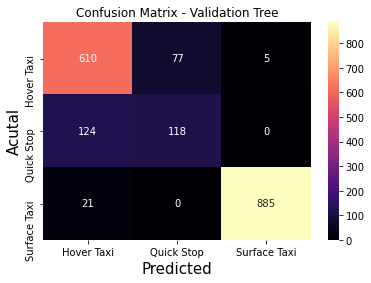

In [45]:
#Validation tree polished confusion matrix
cmp_valid = pd.DataFrame(dtcm3)
ax = plt.axes()
sns.heatmap(cmp_valid, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Validation Tree')
ax.set_xlabel('Predicted', fontsize = 15)
ax.xaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])
ax.set_ylabel('Acutal', fontsize = 15)
ax.yaxis.set_ticklabels(['Hover Taxi', 'Quick Stop', 'Surface Taxi'])